In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

# Analyse your spatial data using sliding windows

This example shows how to use {func}`squidpy.tl.sliding_window` to divide the 
obs of an {attr}`anndata.AnnData` object into adjecent, potentially overlapping,
windows.

In [3]:
import matplotlib.pyplot as plt
import squidpy as sq
import scanpy as sc


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/icb/mostafa.shahhosseini/miniconda3/envs/squidpy_dev/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/icb/mostafa.shahhosseini/miniconda3/envs/squidpy_dev/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/icb/mostafa.shahhosseini/miniconda3/envs/squidpy_dev/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/icb/mostafa.shahhosseini/mi

First, let's download the MIBI-TOF dataset.

In [242]:
adata = sc.read_h5ad('/lustre/groups/ml01/projects/2024_spatial_long_range_GT_francesca.drummer/data/cosmx_pancreas_s1.h5ad')

In [243]:
adata = adata[adata.obs['fov']=='12']

In [244]:
sq.tl.sliding_window(
    adata=adata,
    # library_key="fov",  # to stratify by sample
    max_n_cells=2500,
    overlap=0,
    copy=False,  # we modify in place
)

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/tl/_sliding_window.py:107: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[library_key] = 'fov1'
/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/tl/_sliding_window.py:215: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sliding_window_df.loc[:, sliding_window_key].fillna("out_of_window", inplace=True)


In [255]:
sq.tl.sliding_window(
    adata=adata,
    library_key="fov",  # to stratify by sample
    max_n_cells=2000,
    overlap=0,
    split_line='v',
    copy=False,  # we modify in place
)

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/tl/_sliding_window.py:215: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sliding_window_df.loc[:, sliding_window_key].fillna("out_of_window", inplace=True)


/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/pl/_spatial_utils.py:974: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


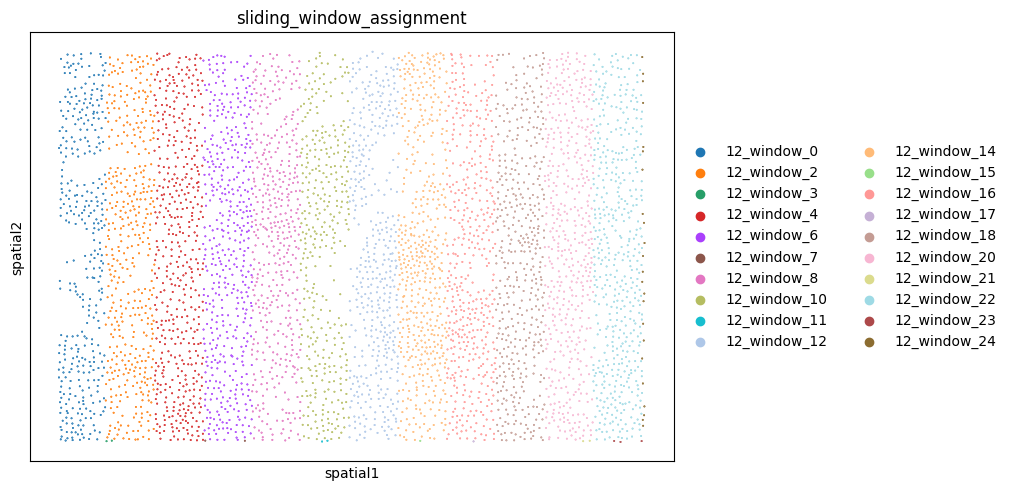

In [256]:
sq.pl.spatial_scatter(
    adata, color="sliding_window_assignment", library_key="fov", figsize=(10, 10), shape=None,
        # library_id='10',
)

In [257]:
adata.obs['sliding_window_assignment'].value_counts()

sliding_window_assignment
12_window_14    495
12_window_22    470
12_window_4     463
12_window_6     460
12_window_20    452
12_window_16    436
12_window_8     427
12_window_18    426
12_window_2     423
12_window_12    412
12_window_0     356
12_window_10    352
12_window_24     23
12_window_23      3
12_window_3       2
12_window_7       2
12_window_21      2
12_window_11      2
12_window_15      1
12_window_17      1
Name: count, dtype: int64

In [272]:
sq.tl.sliding_window(
    adata=adata,
    library_key="fov",  # to stratify by sample
    n_splits=3,
    overlap=0,
    drop_partial_windows=False,  # This should remove small windows at the edges
    copy=False,  # we modify in place
)

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/tl/_sliding_window.py:228: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sliding_window_df[sliding_window_key].unique(),


In [273]:
adata.obs['sliding_window_assignment'].value_counts()

sliding_window_assignment
12_window_1    1822
12_window_2    1816
12_window_0    1538
12_window_3      13
12_window_5       7
12_window_6       7
12_window_4       5
Name: count, dtype: int64

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/pl/_spatial_utils.py:974: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


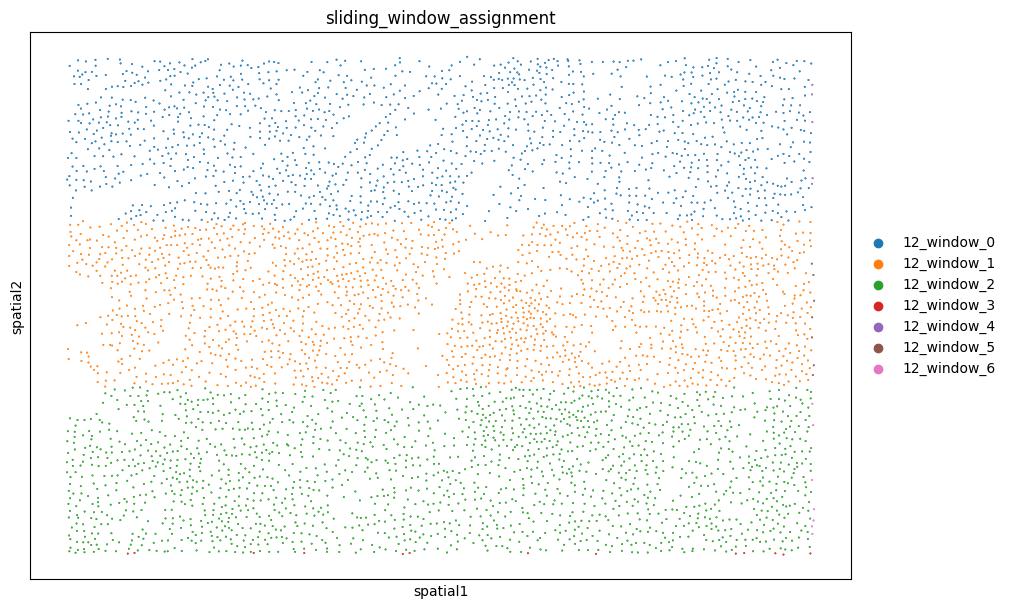

In [274]:
sq.pl.spatial_scatter(
    adata, color="sliding_window_assignment", library_key="fov", figsize=(10, 10), shape=None,
        # library_id='10',
)

In [275]:
sq.tl.sliding_window(
    adata=adata,
    library_key="fov",  # to stratify by sample
    n_splits=3,
    overlap=0,
    drop_partial_windows=True,  # This should remove small windows at the edges
    copy=False,  # we modify in place
)

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/tl/_sliding_window.py:228: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sliding_window_df[sliding_window_key].unique(),


In [276]:
adata.obs['sliding_window_assignment'].value_counts()

sliding_window_assignment
12_window_1        1822
12_window_2        1818
12_window_0        1538
out_of_window_0      30
Name: count, dtype: int64

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/pl/_spatial_utils.py:974: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


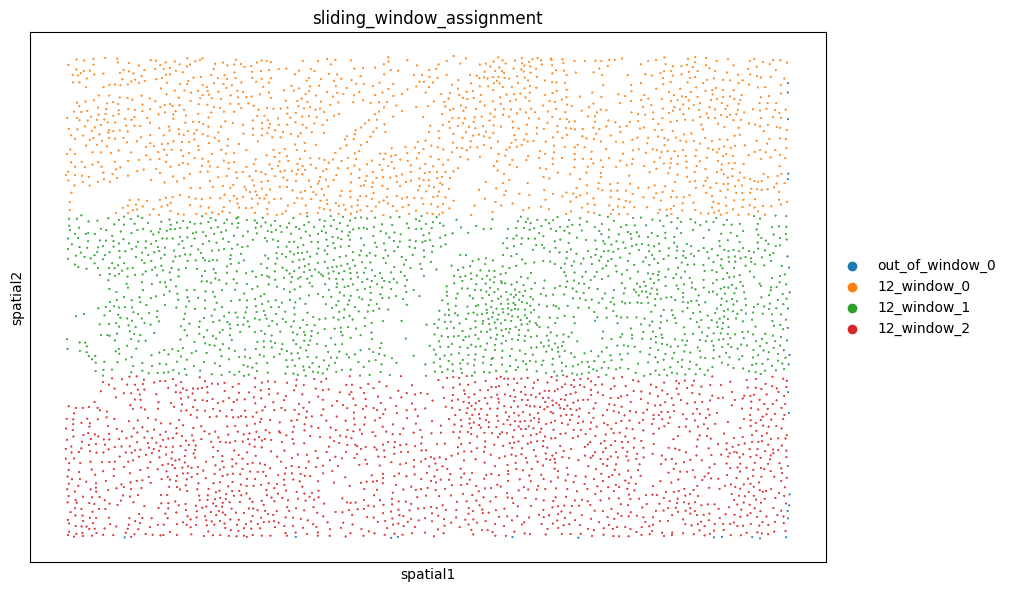

In [277]:
sq.pl.spatial_scatter(
    adata, color="sliding_window_assignment", library_key="fov", figsize=(10, 10), shape=None,
        # library_id='10',
)

In [278]:
df = sq.tl.sliding_window(
    adata=adata,
    library_key="fov",  # to stratify by sample
    n_splits=3,
    overlap=0,
    drop_partial_windows=False,  # This should remove small windows at the edges
    copy=True,  # we modify in place
)

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/tl/_sliding_window.py:228: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sliding_window_df[sliding_window_key].unique(),


In [279]:
df

,sliding_window_assignment
1_12,12_window_2
2_12,12_window_2
3_12,12_window_3
4_12,12_window_3
5_12,12_window_2
...,...
5224_12,12_window_0
5225_12,12_window_0
5226_12,12_window_0
5227_12,12_window_0


In [280]:
adata.obs['sliding_window_assignment'].value_counts()

sliding_window_assignment
12_window_1        1822
12_window_2        1818
12_window_0        1538
out_of_window_0      30
Name: count, dtype: int64

In [262]:
sq.tl.sliding_window(
    adata=adata,
    # library_key="fov",  # to stratify by sample
    max_n_cells=5000,
    overlap=0,
    copy=False,  # we modify in place
)

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/tl/_sliding_window.py:215: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sliding_window_df.loc[:, sliding_window_key].fillna("out_of_window", inplace=True)


In [231]:
pdata.obs['sliding_window_assignment'].value_counts()

sliding_window_assignment
fov1_window_1    1623
fov1_window_2    1609
fov1_window_0    1378
fov1_window_3     579
fov1_window_4       5
fov1_window_5       5
fov1_window_6       5
fov1_window_7       4
Name: count, dtype: int64

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/pl/_spatial_utils.py:974: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


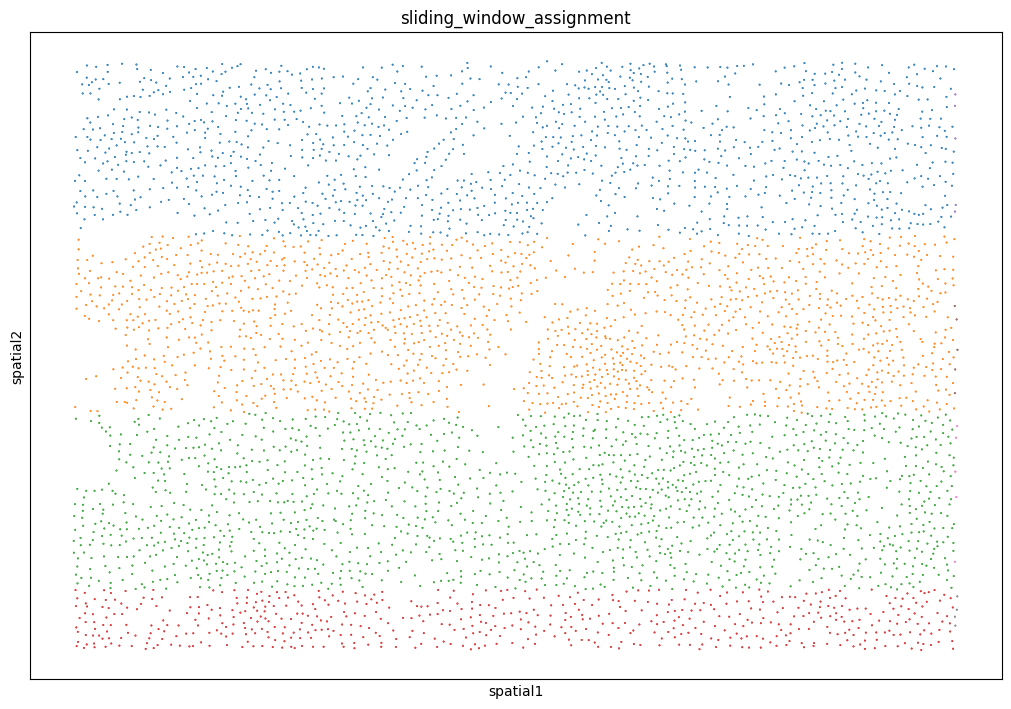

In [232]:
sq.pl.spatial_scatter(
    pdata, color="sliding_window_assignment", library_key="fov", figsize=(10, 10), legend_loc=None, shape=None,
        # library_id='10',
)

In [233]:
sq.tl.sliding_window(
    adata=pdata,
    # library_key="fov",  # to stratify by sample
    square=True,
    max_n_cells=5000,
    overlap=0,
    copy=False,  # we modify in place
)

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/tl/_sliding_window.py:215: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sliding_window_df.loc[:, sliding_window_key].fillna("out_of_window", inplace=True)


In [234]:
pdata.obs['sliding_window_assignment'].value_counts()

sliding_window_assignment
fov1_window_2    1999
fov1_window_0    1795
fov1_window_3     700
fov1_window_1     695
fov1_window_4      14
fov1_window_5       5
Name: count, dtype: int64

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/pl/_spatial_utils.py:974: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


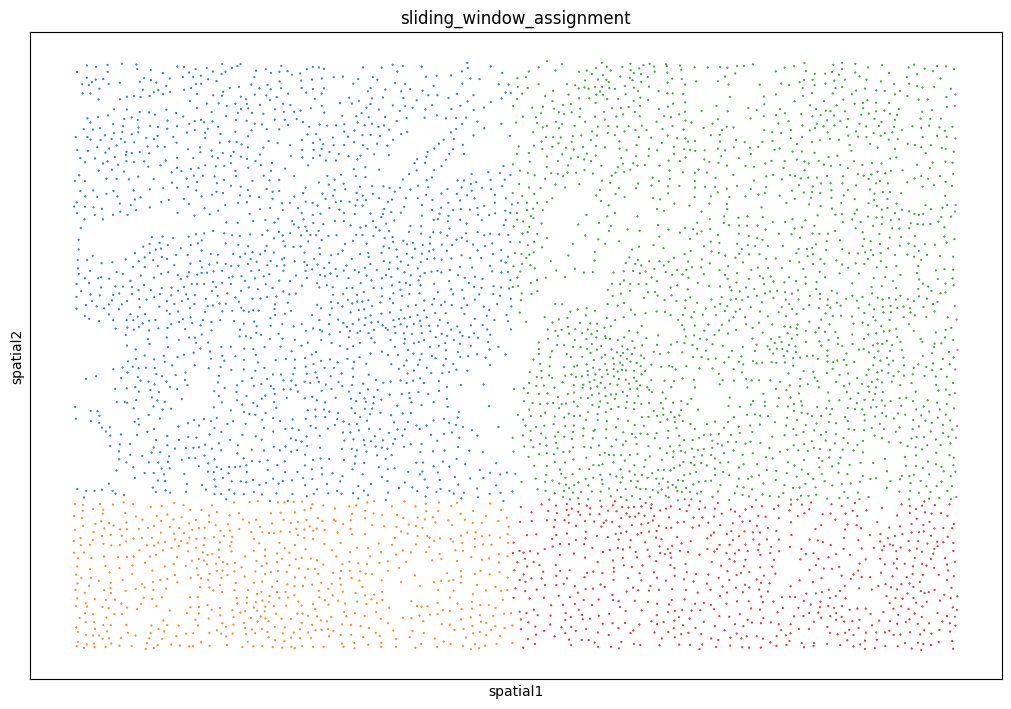

In [235]:
sq.pl.spatial_scatter(
    pdata, color="sliding_window_assignment", library_key="fov", figsize=(10, 10), legend_loc=None, shape=None,
        # library_id='10',
)

In [236]:
sq.tl.sliding_window(
    adata=pdata,
    # library_key="fov",  # to stratify by sample
    square=True,
    max_n_cells=5000,
    overlap=0,
    copy=False,  # we modify in place
    drop_partial_windows=True
)

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/tl/_sliding_window.py:215: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sliding_window_df.loc[:, sliding_window_key].fillna("out_of_window", inplace=True)


In [237]:
pdata.obs['sliding_window_assignment'].value_counts()

sliding_window_assignment
fov1_window_1      1999
fov1_window_0      1797
out_of_window_0    1412
Name: count, dtype: int64

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/pl/_spatial_utils.py:974: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


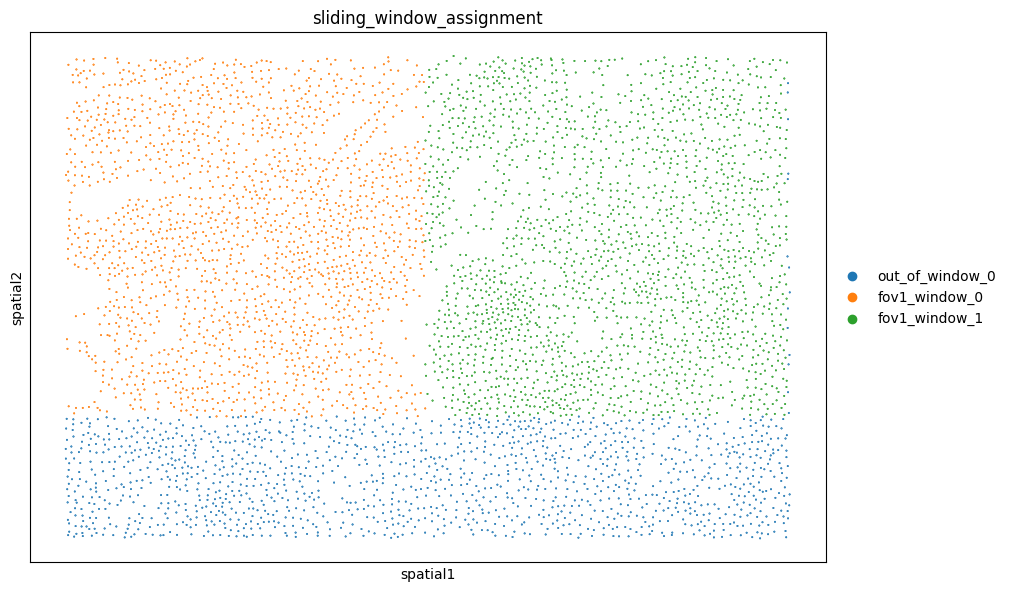

In [238]:
sq.pl.spatial_scatter(
    pdata, color="sliding_window_assignment", library_key="fov", figsize=(10, 10), shape=None,
        # library_id='10',
)

In [239]:
sq.tl.sliding_window(
    adata=pdata,
    # library_key="fov",  # to stratify by sample
    square=True,
    max_n_cells=2000,
    overlap=0,
    copy=False,  # we modify in place
    drop_partial_windows=True
)

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/tl/_sliding_window.py:215: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sliding_window_df.loc[:, sliding_window_key].fillna("out_of_window", inplace=True)


In [240]:
pdata.obs['sliding_window_assignment'].value_counts()

sliding_window_assignment
fov1_window_5      951
fov1_window_3      883
fov1_window_1      874
fov1_window_4      834
fov1_window_0      830
fov1_window_2      803
out_of_window_0     33
Name: count, dtype: int64

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/pl/_spatial_utils.py:974: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


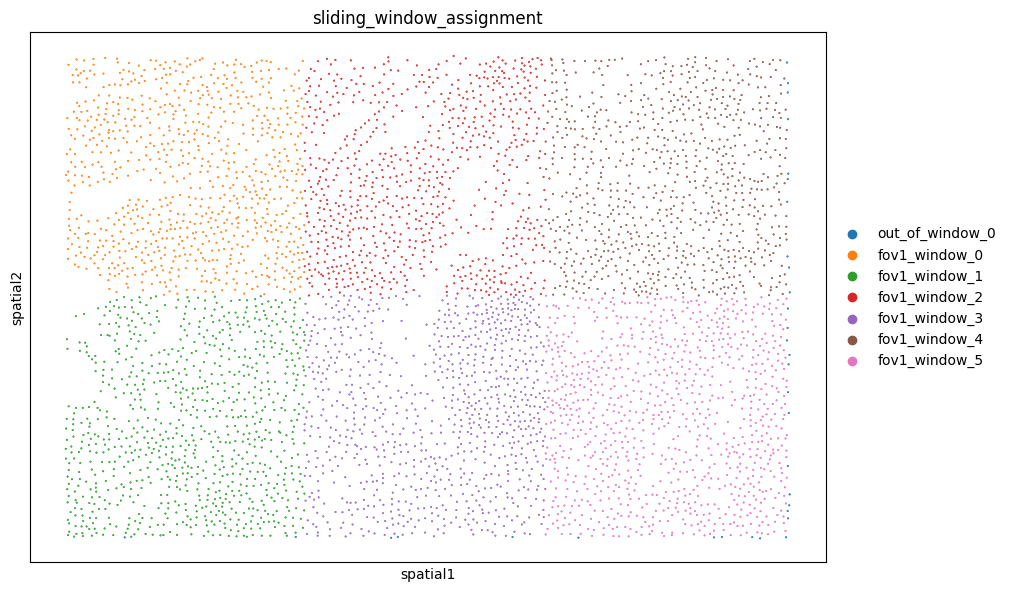

In [241]:
sq.pl.spatial_scatter(
    pdata, color="sliding_window_assignment", library_key="fov", figsize=(10, 10), shape=None,
        # library_id='10',
)

In [286]:
sq.tl.sliding_window(
    adata=pdata,
    # library_key="fov",  # to stratify by sample
    window_size=(2000, 1000),
    overlap=0,
    copy=False,  # we modify in place
    drop_partial_windows=True
)

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/tl/_sliding_window.py:228: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sliding_window_df[sliding_window_key].unique(),


In [287]:
pdata.obs['sliding_window_assignment'].value_counts()

sliding_window_assignment
out_of_window_0    2132
fov1_window_5       578
fov1_window_4       534
fov1_window_1       533
fov1_window_2       499
fov1_window_0       487
fov1_window_3       445
Name: count, dtype: int64

/ictstr01/home/icb/mostafa.shahhosseini/code/repos/squidpy/src/squidpy/pl/_spatial_utils.py:974: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


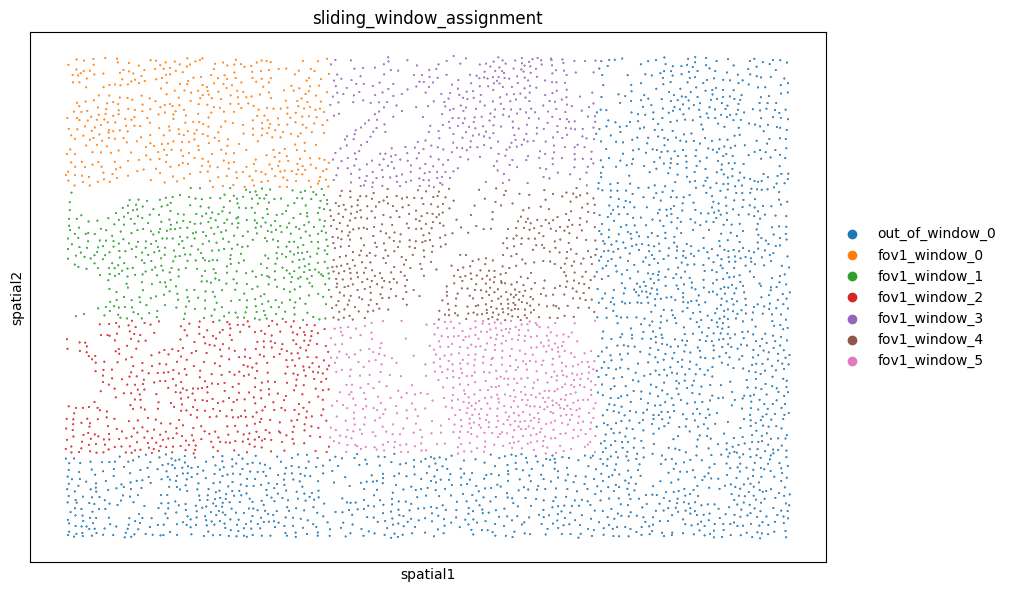

In [288]:
sq.pl.spatial_scatter(
    pdata, color="sliding_window_assignment", library_key="fov", figsize=(10, 10), shape=None,
        # library_id='10',
)